<h1 style="color:#872325">Cross Validation</h1>
<h3>Sergio de la Cruz Badillo, dlcruzser12@gmail.com</h3>

<h3>Import libraries</h3>

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<h2 href="#data_exploration">Data exploration</h2>

<h3>Import data</h3>
<p>The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. You can find the "Ames Housing dataset" from the following link: <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data</a>. We will be using this data set throughout this notebook.</p>

In [2]:
df_housing = pd.read_csv("../files/house-prices-advanced-regression-techniques/train.csv")
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Columns (variables):\n\n{}"
      .format(list(df_housing.columns)))

Columns (variables):

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'

In [4]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


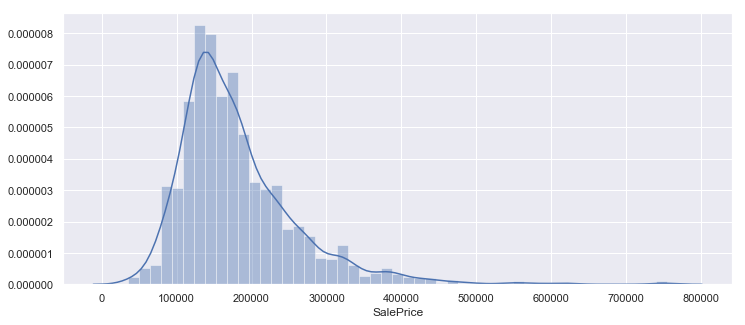

In [5]:
sns.set(rc={"figure.figsize": (12, 5)}); np.random.seed(0);
sns.distplot(df_housing['SalePrice'])
plt.show()

<h2 id="data_preprocessing">Data preprocessing</h2>

In [6]:
df_housing = df_housing.drop(["Id"], axis=1)
df_housing = df_housing.fillna(0)

In [7]:
column_selector = ColumnTransformer([
    ("onehot", OneHotEncoder(sparse=False), ["LotConfig","BldgType"]),
    ("impute", SimpleImputer(), make_column_selector(dtype_include=["float","integer"]))
])

grid = {
    "lasso__alpha": [0.1 * 10 ** (i/2) for i in range(1, 15)],
}

pipe = Pipeline([
    ("column_selector", column_selector),
    ("lasso", Lasso(alpha=.1, tol=0.5))
])

In [8]:
scoring_list = ["r2", "neg_mean_absolute_error"]

train, test = train_test_split(df_housing, test_size=0.05, random_state=2718)
x_train, y_train = train.drop("SalePrice", axis=1), train["SalePrice"] 
cv = cross_validate(pipe, x_train, y_train, cv=10, scoring=scoring_list)

In [9]:
%%time
gsearch_cv = GridSearchCV(pipe, grid, scoring="neg_mean_absolute_error", return_train_score=True, cv=5)
gsearch_cv.fit(x_train, y_train)
gsearch_cv.cv_results_
;

CPU times: user 3.76 s, sys: 37 ms, total: 3.8 s
Wall time: 1.95 s


''

In [10]:
cv = cross_validate(gsearch_cv.best_estimator_, x_train, y_train, cv=10, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

print("Mean r2: {}".format(r2.mean()))
print("Mean mae: {}".format(mae.mean()))

Mean r2: 0.7839863862369315
Mean mae: 23573.843363718504
